# Exploratory Data Analysis (EDA) using Python
#### Chukiat Worasucheep (August 2022)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.precision", 2)


In [6]:
# Read csv file of World's University Ranking 2012-2015 (extract from Kaggle)
# show
df = pd.read_csv("uranking12-15.csv")
df.shape

(2200, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2198 non-null   float64
 5   alumni_employment     2200 non-null   int64  
 6   publications          2196 non-null   float64
 7   influence             2196 non-null   float64
 8   citations             2198 non-null   float64
 9   patents               2198 non-null   float64
 10  score                 2200 non-null   float64
 11  year                  2200 non-null   int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 206.4+ KB


In [8]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,publications,influence,citations,patents,score,year
count,2200.00,2200.00,2198.00,2200.00,2196.00,2196.00,2198.00,2198.00,2200.00,2200.00
mean,459.59,40.28,275.02,357.12,459.46,459.22,413.48,432.98,47.80,2014.32
std,304.32,51.74,121.96,186.78,303.72,303.27,264.48,273.85,7.76,0.76
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,43.36,2012.00
25%,175.75,6.00,175.25,175.75,175.00,175.00,161.00,170.25,44.46,2014.00
50%,450.50,21.00,355.00,450.50,450.00,449.50,406.00,426.00,45.10,2014.00
75%,725.25,49.00,367.00,478.00,725.00,725.00,645.00,712.75,47.55,2015.00
max,1000.00,229.00,367.00,567.00,1000.00,991.00,812.00,871.00,100.00,2015.00


In [9]:
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,publications,influence,citations,patents,score,year
0,1,Harvard University,USA,1,7.0,9,1.0,1.0,1.0,5.0,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9.0,17,12.0,4.0,4.0,1.0,91.67,2012
2,3,Stanford University,USA,3,17.0,11,4.0,2.0,2.0,15.0,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10.0,24,16.0,16.0,11.0,50.0,86.17,2012
4,5,California Institute of Technology,USA,4,2.0,29,37.0,22.0,22.0,18.0,85.21,2012


In [10]:
df.tail()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,publications,influence,citations,patents,score,year
2195,996,University of the Algarve,Portugal,7,367.0,567,926.0,NaN,812.0,816.0,44.03,2015
2196,997,Alexandria University,Egypt,4,236.0,566,NaN,908.0,645.0,871.0,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367.0,549,830.0,823.0,812.0,824.0,44.03,2015
2198,999,University of A Coruña,Spain,40,367.0,567,886.0,974.0,812.0,651.0,44.02,2015
2199,1000,China Pharmaceutical University,China,83,367.0,567,861.0,991.0,812.0,547.0,44.02,2015


In [11]:
# Describe only columns with specific types
df.describe(include=['object', 'bool'])

,institution,country
count,2200,2200
unique,1024,59
top,Harvard University,USA
freq,4,573


In [12]:
# Number of rows (records)
len(df)

2200

# Indexing and retrieving data

A DataFrame can be indexed in a few different ways.

For pandas objects (Series, DataFrame), the indexing operator [] only accepts

1. colname or list of colnames to select column(s)
2. slicing or Boolean array to select row(s), i.e. it only refers to one dimension of the dataframe.

For df[[colname(s)]], the interior brackets are for list, and the outside brackets are indexing operator, i.e. you must use double brackets if you select two or more columns.

<font color='red'>With one column name, single pair of brackets returns a Series, while double brackets return a dataframe.</font>

Ref: https://stackoverflow.com/questions/33417991/pandas-why-are-double-brackets-needed-to-select-column-after-boolean-indexing

In [13]:
df['institution']   # With one column name, single pair of brackets returns a Series

0                          Harvard University
1       Massachusetts Institute of Technology
2                         Stanford University
3                     University of Cambridge
4          California Institute of Technology
                        ...                  
2195                University of the Algarve
2196                    Alexandria University
2197              Federal University of Ceará
2198                   University of A Coruña
2199          China Pharmaceutical University
Name: institution, Length: 2200, dtype: object

In [14]:
df[['institution']]   # With one column name, a double brackets return a dataframe

,institution
0,Harvard University
1,Massachusetts Institute of Technology
2,Stanford University
3,University of Cambridge
4,California Institute of Technology
...,...
2195,University of the Algarve
2196,Alexandria University
2197,Federal University of Ceará
2198,University of A Coruña


In [15]:
df[['year', 'institution', 'score']] # Use list of column names inside the bracket to get more than one columns

,year,institution,score
0,2012,Harvard University,100.00
1,2012,Massachusetts Institute of Technology,91.67
2,2012,Stanford University,89.50
3,2012,University of Cambridge,86.17
4,2012,California Institute of Technology,85.21
...,...,...,...
2195,2015,University of the Algarve,44.03
2196,2015,Alexandria University,44.03
2197,2015,Federal University of Ceará,44.03
2198,2015,University of A Coruña,44.02


## Boolean indexing or conditional filtering

**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where `P` is some logical condition that is checked for each element of the `Name` column. The result of such indexing is the DataFrame consisting only of rows that satisfy the `P` condition on the `Name` column. 

Let's use it to answer the question:

**ค่าเฉลี่ยของ score ของประเทศไทยเท่ากับเท่าใด**

In [16]:
# 1. Filter only records of Thailand
#
df[df['country']=='Thailand']

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,publications,influence,citations,patents,score,year
482,283,Chulalongkorn University,Thailand,1,355.0,51,580.0,752.0,406.0,737.0,46.55,2014
749,550,Mahidol University,Thailand,2,355.0,478,479.0,366.0,406.0,737.0,44.96,2014
1070,871,Chiang Mai University,Thailand,3,355.0,478,838.0,706.0,609.0,737.0,44.43,2014
1510,311,Chulalongkorn University,Thailand,1,367.0,57,584.0,734.0,511.0,871.0,45.86,2015
1731,532,Mahidol University,Thailand,2,367.0,567,476.0,372.0,368.0,861.0,44.69,2015
2017,818,Chiang Mai University,Thailand,3,367.0,550,847.0,753.0,511.0,871.0,44.21,2015


In [21]:
df[df['country']=='Thailand']['score']

482     46.55
749     44.96
1070    44.43
1510    45.86
1731    44.69
2017    44.21
Name: score, dtype: float64

In [22]:
df[df['country']=='Thailand'][['institution','score']]

,institution,score
482,Chulalongkorn University,46.55
749,Mahidol University,44.96
1070,Chiang Mai University,44.43
1510,Chulalongkorn University,45.86
1731,Mahidol University,44.69
2017,Chiang Mai University,44.21


In [17]:
df[df['country']=='Thailand'].mean(numeric_only=True)

world_rank               560.83
national_rank              2.00
quality_of_education     361.00
alumni_employment        363.50
publications             634.00
influence                613.83
citations                468.50
patents                  802.33
score                     45.12
year                    2014.50
dtype: float64

## Row indexing by name and by number

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The `loc` method is used for **indexing by name**, while `iloc()` is used for **indexing by number**.

In the first case below, we say *"give us the values of the rows with index from 0 to 5 **(inclusive)** and columns labeled from world_rank to national_rank **(inclusive)"**. In the second case, we say *"give us the values of the first five rows in the first three columns"* (as in a typical Python slice: the maximal value is **not** included).

In [23]:
df.loc[0:5, 'world_rank':'national_rank']

,world_rank,institution,country,national_rank
0,1,Harvard University,USA,1
1,2,Massachusetts Institute of Technology,USA,2
2,3,Stanford University,USA,3
3,4,University of Cambridge,United Kingdom,1
4,5,California Institute of Technology,USA,4
5,6,Princeton University,USA,5


In [24]:
df.iloc[0:5, 0:3]

,world_rank,institution,country
0,1,Harvard University,USA
1,2,Massachusetts Institute of Technology,USA
2,3,Stanford University,USA
3,4,University of Cambridge,United Kingdom
4,5,California Institute of Technology,USA


If we need the n first or the n last lines of the data frame, we can use the `df[:n]` or `df[-n:]` construct:

In [25]:
df[-3:]  # like df.tail(3)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,publications,influence,citations,patents,score,year
2197,998,Federal University of Ceará,Brazil,18,367.0,549,830.0,823.0,812.0,824.0,44.03,2015
2198,999,University of A Coruña,Spain,40,367.0,567,886.0,974.0,812.0,651.0,44.02,2015
2199,1000,China Pharmaceutical University,China,83,367.0,567,861.0,991.0,812.0,547.0,44.02,2015


## unique() for distinct values

In [26]:
# แสดงรายชื่อมหาวิทยาลัยทั้งหมด ไม่ซ้ำ
df['institution'].unique()

array(['Harvard University', 'Massachusetts Institute of Technology',
       'Stanford University', ..., 'Babeș-Bolyai University',
       'Henan Normal University', 'Southwest Jiaotong University'],
      dtype=object)

In [31]:
df['country'].value_counts()

USA                     573
China                   167
Japan                   159
United Kingdom          144
Germany                 115
France                  109
Italy                    96
Spain                    81
Canada                   72
South Korea              72
Australia                58
Taiwan                   46
Brazil                   36
India                    31
Netherlands              29
Switzerland              26
Sweden                   24
Austria                  24
Israel                   22
Finland                  20
Turkey                   20
Belgium                  20
Poland                   18
Iran                     16
Ireland                  16
Portugal                 14
Greece                   14
Hong Kong                12
Norway                   12
New Zealand              12
Hungary                  12
Denmark                  12
South Africa             10
Czech Republic           10
Russia                    9
Saudi Arabia        

In [30]:
# อยากทราบว่าแต่ละประเทศมีกี่รายการในข้อมูลทั้งหมด แต่ต้องการเพียง Top 10
df['country'].value_counts().head(10)

USA               573
China             167
Japan             159
United Kingdom    144
Germany           115
France            109
Italy              96
Spain              81
Canada             72
South Korea        72
Name: country, dtype: int64

In [28]:
# อยากนับจำนวนประเทศทั้งหมดในข้อมูล ทำแบบนี้
df['country'].value_counts().count()

59

In [32]:
df['country'].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'Canada', 'France', 'Sweden', 'South Korea', 'Italy', 'Germany',
       'Netherlands', 'Finland', 'Norway', 'Australia', 'Denmark',
       'Singapore', 'Russia', 'China', 'Taiwan', 'Belgium',
       'South Africa', 'Spain', 'Brazil', 'Hong Kong', 'Ireland',
       'Austria', 'New Zealand', 'Portugal', 'Thailand', 'Czech Republic',
       'Malaysia', 'India', 'Greece', 'Mexico', 'Hungary', 'Argentina',
       'Turkey', 'Poland', 'Saudi Arabia', 'Chile', 'Iceland', 'Slovenia',
       'Estonia', 'Lebanon', 'Croatia', 'Colombia', 'Slovak Republic',
       'Iran', 'Egypt', 'Serbia', 'Bulgaria', 'Lithuania', 'Uganda',
       'United Arab Emirates', 'Uruguay', 'Cyprus', 'Romania',
       'Puerto Rico'], dtype=object)

In [33]:
len(df['country'].unique()) # อยากนับจำนวนประเทศทั้งหมดในข้อมูล ทำแบบนี้ก็ได้

59

## Check for "missing values"

In [34]:
# Numbers of missing values by columns
df.isnull().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    2
alumni_employment       0
publications            4
influence               4
citations               2
patents                 2
score                   0
year                    0
dtype: int64

In [35]:
# The frequency of missing values (absolute)
df.isnull().sum().sum()

14

In [36]:
# The frequency of missings (relative)
df.isnull().sum() / len(df) * 100

world_rank              0.00
institution             0.00
country                 0.00
national_rank           0.00
quality_of_education    0.09
alumni_employment       0.00
publications            0.18
influence               0.18
citations               0.09
patents                 0.09
score                   0.00
year                    0.00
dtype: float64

In [37]:
# Summarized check if there is any missings
df.isna().any().any()

True

## Drop or remove all rows with missing value

In [38]:
cleaned = df.dropna()
cleaned.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,publications,influence,citations,patents,score,year
count,2186.00,2186.00,2186.00,2186.00,2186.00,2186.00,2186.00,2186.00,2186.00,2186.00
mean,457.74,40.39,274.60,356.61,458.43,458.13,412.78,431.68,47.82,2014.32
std,303.56,51.81,122.14,186.88,303.75,302.95,264.59,273.59,7.78,0.76
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,43.36,2012.00
25%,174.00,6.00,174.00,175.00,174.00,174.00,161.00,170.00,44.47,2014.00
50%,448.50,21.00,355.00,449.50,448.00,448.50,406.00,426.00,45.11,2014.00
75%,722.75,49.00,367.00,478.00,724.00,722.75,645.00,708.75,47.59,2015.00
max,1000.00,229.00,367.00,567.00,1000.00,991.00,812.00,871.00,100.00,2015.00


In [39]:
# drop rows with only missing values in specific columns
cleaned = df.dropna(subset=['citations', 'patents'])
cleaned.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,publications,influence,citations,patents,score,year
count,2196.00,2196.00,2194.00,2196.00,2192.00,2192.00,2196.00,2196.00,2196.00,2196.00
mean,459.15,40.34,274.86,357.16,459.21,458.84,413.40,432.98,47.80,2014.32
std,304.23,51.76,122.01,186.83,303.93,303.29,264.55,273.90,7.77,0.76
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,43.36,2012.00
25%,175.00,6.00,175.00,175.75,174.75,174.75,161.00,170.00,44.46,2014.00
50%,450.00,21.00,355.00,451.50,449.00,449.00,406.00,426.00,45.10,2014.00
75%,724.25,49.00,367.00,478.00,725.00,724.25,645.00,713.25,47.56,2015.00
max,1000.00,229.00,367.00,567.00,1000.00,991.00,812.00,871.00,100.00,2015.00


In [40]:
# Show only rows with missing value(s)
null_data = df[df.isnull().any(axis=1)]
null_data

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,publications,influence,citations,patents,score,year
854,655,Hacettepe University,Turkey,3,355.0,478,636.0,NaN,406.0,737.0,44.71,2014
972,773,Istanbul Technical University,Turkey,4,355.0,388,641.0,858.0,NaN,637.0,44.56,2014
1190,991,Zhejiang Normal University,China,81,355.0,478,905.0,NaN,800.0,737.0,44.26,2014
1191,992,King Abdulaziz University,Saudi Arabia,4,355.0,470,843.0,NaN,609.0,637.0,44.26,2014
1192,993,Iran University of Science and Technology,Iran,8,355.0,478,NaN,987.0,493.0,737.0,44.25,2014
1198,999,National University of Defense Technology,China,83,NaN,478,860.0,973.0,800.0,637.0,44.21,2014
1486,287,Umeå University,Sweden,7,NaN,567,275.0,198.0,212.0,871.0,46.14,2015
1490,291,University of Texas at San Antonio,USA,112,367.0,567,NaN,376.0,197.0,254.0,46.10,2015
1505,306,Stellenbosch University,South Africa,3,367.0,66,520.0,503.0,NaN,219.0,45.92,2015
1669,470,Middle East Technical University,Turkey,1,367.0,120,NaN,879.0,511.0,871.0,44.87,2015



## Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by *Total day charge* (use `ascending=False` to sort in descending order):


In [41]:
df.sort_values(by='alumni_employment')

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,publications,influence,citations,patents,score,year
1200,1,Harvard University,USA,1,1.0,1,1.0,1.0,1.0,3.0,100.00,2015
200,1,Harvard University,USA,1,1.0,1,1.0,1.0,1.0,2.0,100.00,2014
100,1,Harvard University,USA,1,1.0,1,1.0,1.0,1.0,7.0,100.00,2013
1201,2,Stanford University,USA,2,9.0,2,5.0,3.0,3.0,10.0,98.66,2015
201,2,Stanford University,USA,2,11.0,2,5.0,3.0,3.0,6.0,99.09,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1791,592,University of Toledo,USA,177,367.0,567,618.0,555.0,812.0,220.0,44.53,2015
1788,589,Federal University of São Paulo,Brazil,6,367.0,567,504.0,638.0,368.0,839.0,44.53,2015
1784,585,University of Montana - Missoula,USA,174,353.0,567,713.0,315.0,428.0,702.0,44.54,2015
1834,635,State University of New York Upstate Medical U...,USA,186,367.0,567,774.0,632.0,428.0,598.0,44.45,2015


In [43]:
df.sort_values(by='alumni_employment',ascending=False)


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,publications,influence,citations,patents,score,year
2199,1000,China Pharmaceutical University,China,83,367.0,567,861.0,991.0,812.0,547.0,44.02,2015
1774,575,Second University of Naples,Italy,31,367.0,567,556.0,641.0,645.0,824.0,44.57,2015
1780,581,Sogang University,South Korea,21,367.0,567,806.0,798.0,812.0,115.0,44.56,2015
1781,582,University of Ioannina,Greece,4,367.0,567,597.0,836.0,645.0,871.0,44.55,2015
1782,583,Federal University of Rio Grande do Sul,Brazil,5,367.0,567,410.0,578.0,428.0,787.0,44.55,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
101,2,Stanford University,USA,2,11.0,2,6.0,2.0,2.0,11.0,93.94,2013
201,2,Stanford University,USA,2,11.0,2,5.0,3.0,3.0,6.0,99.09,2014
200,1,Harvard University,USA,1,1.0,1,1.0,1.0,1.0,2.0,100.00,2014
100,1,Harvard University,USA,1,1.0,1,1.0,1.0,1.0,7.0,100.00,2013


We can also sort by multiple columns:

In [42]:
df.sort_values(by=['score', 'quality_of_education'], ascending=[False, True])

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,publications,influence,citations,patents,score,year
100,1,Harvard University,USA,1,1.0,1,1.0,1.0,1.0,7.0,100.00,2013
200,1,Harvard University,USA,1,1.0,1,1.0,1.0,1.0,2.0,100.00,2014
1200,1,Harvard University,USA,1,1.0,1,1.0,1.0,1.0,3.0,100.00,2015
0,1,Harvard University,USA,1,7.0,9,1.0,1.0,1.0,5.0,100.00,2012
201,2,Stanford University,USA,2,11.0,2,5.0,3.0,3.0,6.0,99.09,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,University of Texas MD Anderson Cancer Center,USA,58,101.0,101,95.0,46.0,66.0,100.0,43.88,2012
96,97,University of Nottingham,United Kingdom,6,101.0,101,101.0,101.0,101.0,92.0,43.79,2012
97,98,University of Bristol,United Kingdom,7,101.0,101,75.0,81.0,86.0,101.0,43.77,2012
98,99,Utrecht University,Netherlands,2,100.0,101,65.0,101.0,60.0,101.0,43.47,2012


In [45]:
# ให้เรียงคล้ายข้อที่แล้ว แต่ให้ได้ผลลัพธ์แค่ 3 columns i.e. year (เรียงลง), institution (เรียงขึ้น), and score (เรียงลง) และแสดงแค่ 10 อันดับแรกพอ

df.sort_values(by=['year','institution','score'],ascending=[False,True,False]).head(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,publications,influence,citations,patents,score,year
1981,782,AGH University of Science and Technology,Poland,4,267.0,279,708.0,891.0,511.0,398.0,44.26,2015
1764,565,Aalborg University,Denmark,5,367.0,439,596.0,660.0,287.0,401.0,44.59,2015
1620,421,Aalto University,Finland,4,367.0,224,336.0,403.0,645.0,246.0,45.10,2015
1321,122,Aarhus University,Denmark,2,310.0,165,91.0,81.0,101.0,154.0,49.65,2015
2013,814,Aberystwyth University,United Kingdom,59,367.0,567,842.0,552.0,511.0,607.0,44.22,2015
2089,890,Adam Mickiewicz University in Poznań,Poland,5,150.0,567,675.0,775.0,812.0,657.0,44.14,2015
2164,965,Ain Shams University,Egypt,2,367.0,567,875.0,832.0,511.0,871.0,44.06,2015
1405,206,Aix-Marseille University,France,9,218.0,451,119.0,87.0,182.0,230.0,47.31,2015
1632,433,Ajou University,South Korea,14,367.0,426,646.0,729.0,645.0,89.0,45.04,2015
1849,650,Albany Medical College,USA,189,171.0,567,893.0,771.0,645.0,720.0,44.43,2015


### Filter for only universities in Thailand and Singapore

In [46]:
ts = df.loc[ (df['country']=='Thailand') | (df['country']=='Singapore')]
len(ts), ts

(11,
       world_rank                       institution    country  national_rank  \
 186           87  National University of Singapore  Singapore              1   
 273           74  National University of Singapore  Singapore              1   
 347          148  Nanyang Technological University  Singapore              2   
 482          283          Chulalongkorn University   Thailand              1   
 749          550                Mahidol University   Thailand              2   
 1070         871             Chiang Mai University   Thailand              3   
 1264          65  National University of Singapore  Singapore              1   
 1334         135  Nanyang Technological University  Singapore              2   
 1510         311          Chulalongkorn University   Thailand              1   
 1731         532                Mahidol University   Thailand              2   
 2017         818             Chiang Mai University   Thailand              3   
 
       quality_of_edu

In [50]:
tmp = df.copy()
tmp.sort_values(by="publications", ascending=False, inplace=False)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,publications,influence,citations,patents,score,year
1019,820,"National University of Ireland, Maynooth",Ireland,7,215.0,478,1000.0,716.0,800.0,552.0,44.49,2014
2029,830,"University of Wales, Trinity Saint David",United Kingdom,62,367.0,567,1000.0,927.0,645.0,871.0,44.20,2015
2169,970,Ibaraki University,Japan,74,367.0,567,999.0,448.0,645.0,562.0,44.06,2015
1176,977,University of Puerto Rico at Mayagüez,Puerto Rico,1,355.0,478,999.0,778.0,609.0,737.0,44.29,2014
938,739,University of Évry Val d'Essonne,France,34,355.0,478,998.0,363.0,609.0,737.0,44.59,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
0,1,Harvard University,USA,1,7.0,9,1.0,1.0,1.0,5.0,100.00,2012
1192,993,Iran University of Science and Technology,Iran,8,355.0,478,NaN,987.0,493.0,737.0,44.25,2014
1490,291,University of Texas at San Antonio,USA,112,367.0,567,NaN,376.0,197.0,254.0,46.10,2015
1669,470,Middle East Technical University,Turkey,1,367.0,120,NaN,879.0,511.0,871.0,44.87,2015


In [47]:
ts.to_csv('Th-Sg.csv')

## Basic statistics for DataFrame

In [48]:
print('max  =', ts['score'].max())
print('min  =', ts['score'].min())
print('mean =', ts['score'].mean())
print('median =', ts['score'].median())
print('p25  =',   ts['score'].quantile(0.25))
print('p50  =',   ts['score'].quantile(0.50))
print('p75  =',   ts['score'].quantile(0.75))
print('p95  =',   ts['score'].quantile(0.95))

max  = 53.52
min  = 44.21
mean = 47.40909090909091
median = 45.86
p25  = 44.825
p50  = 45.86
p75  = 49.32
p95  = 53.480000000000004



### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**


In [51]:
ts.apply(np.max) 

world_rank                                           871
institution             National University of Singapore
country                                         Thailand
national_rank                                          3
quality_of_education                               367.0
alumni_employment                                    567
publications                                       847.0
influence                                          753.0
citations                                          609.0
patents                                            871.0
score                                              53.52
year                                                2015
dtype: object

The `apply` method can also be used to apply a function to each row. Lambda functions are very convenient in such scenarios. เช่นหากเราต้องการเฉพาะที่ชื่อประเทศขึ้นต้นด้วย T, เราสามารถทำแบบนี้ได้...

In [52]:
ts[ts['country'].apply(lambda c: c[0] == 'T')]   # ต้องการเฉพาะที่ชื่อประเทศขึ้นต้นด้วย T

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,publications,influence,citations,patents,score,year
482,283,Chulalongkorn University,Thailand,1,355.0,51,580.0,752.0,406.0,737.0,46.55,2014
749,550,Mahidol University,Thailand,2,355.0,478,479.0,366.0,406.0,737.0,44.96,2014
1070,871,Chiang Mai University,Thailand,3,355.0,478,838.0,706.0,609.0,737.0,44.43,2014
1510,311,Chulalongkorn University,Thailand,1,367.0,57,584.0,734.0,511.0,871.0,45.86,2015
1731,532,Mahidol University,Thailand,2,367.0,567,476.0,372.0,368.0,861.0,44.69,2015
2017,818,Chiang Mai University,Thailand,3,367.0,550,847.0,753.0,511.0,871.0,44.21,2015


<p>apply() สามารถประยุกต์ใช้งานได้หลากหลายรูปแบบ ศึกษาเพิ่มเติมต่อได้ใน <p>https://www.geeksforgeeks.org/apply-a-function-to-single-or-selected-columns-or-rows-in-pandas-dataframe

## Basic statistics for NumPy array

In [53]:
np.random.seed(123)
data = np.random.normal(0, 1, 1000)

print(data.min(), '\n', data.max())

-3.2310550079193123 
 3.571579218026311


In [54]:
print(data.mean())
print(data.std())
print(data.var())  # variance

-0.03956413608079184
1.0007875375162334
1.001575695247806


In [56]:
# median for NumPy ndarray, UNLIKE that's for DataFrame
np.median(data)

-0.0411855552127819

In [57]:
# quantile 0.25 or percentile for NumPy ndarray, UNLIKE that's for DataFrame
np.quantile(data, 0.25)

-0.6845565903657307

In [58]:
# quantile 0.75 or percentile for NumPy ndarray, UNLIKE that's for DataFrame
np.quantile(data, 0.75)

0.6688657477179376

## Stat's skewness() and kurtosis()
In statistics, <b>skewness</b> is a measure of the asymmetry of the probability distribution of a random variable about its mean. <b>Kurtosis</b> describes the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution.

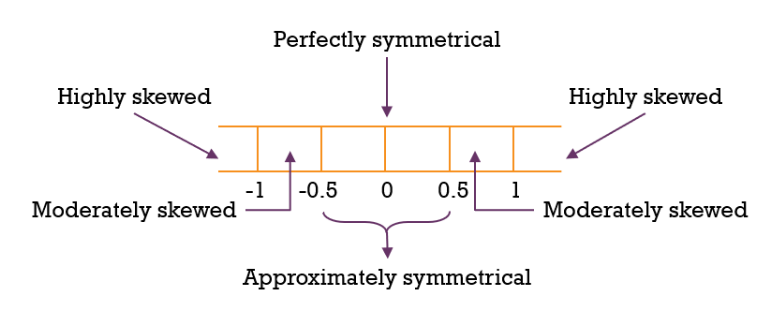

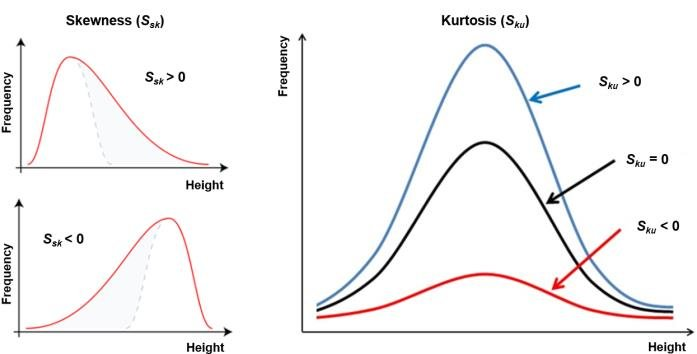

In [60]:
from scipy.stats import kurtosis
from scipy.stats import skew

np.random.seed(123)
data = np.random.normal(0, 1, 1000)

print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ", skew(data))
print("kurt : ", kurtosis(data))

mean :  -0.03956413608079184
var  :  1.001575695247806
skew :  -0.029040113501244424
kurt :  -0.025438528777693037


(array([  2.,   5.,   8.,  19.,  37.,  58.,  77., 106., 132., 154., 112.,
         90.,  91.,  51.,  36.,  13.,   4.,   3.,   1.,   1.]),
 array([-3.23105501, -2.8909233 , -2.55079159, -2.21065987, -1.87052816,
        -1.53039645, -1.19026474, -0.85013303, -0.51000132, -0.16986961,
         0.17026211,  0.51039382,  0.85052553,  1.19065724,  1.53078895,
         1.87092066,  2.21105237,  2.55118408,  2.8913158 ,  3.23144751,
         3.57157922]),
 <BarContainer object of 20 artists>)

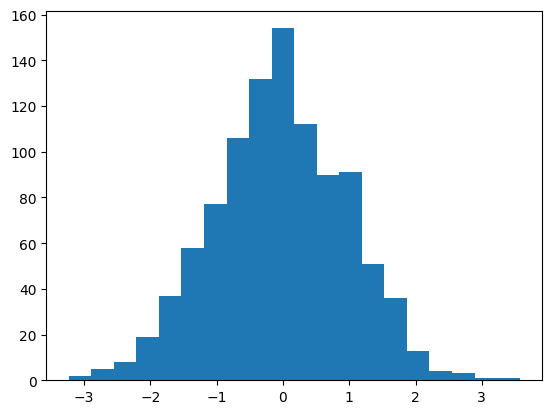

In [61]:
plt.hist(data, bins=20)

In [62]:
neg = np.concatenate((data, [5] * 10))

#neg = np.concatenate((data, [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]))

print("mean : ", np.mean(neg))
print("var  : ", np.var(neg))
print("skew : ", skew(neg))
print("kurt : ", kurtosis(neg))

mean :  0.010332538533869465
var  :  1.240626917965887
skew :  0.7617177784774967
kurt :  2.9201937219460836


(array([ 2.,  0.,  4.,  5.,  4., 11., 15., 23., 28., 43., 48., 43., 64.,
        81., 87., 88., 81., 75., 53., 50., 69., 34., 26., 27., 18.,  9.,
         5.,  2.,  2.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        10.]),
 array([-3.23105501, -3.02527863, -2.81950226, -2.61372588, -2.40794951,
        -2.20217313, -1.99639676, -1.79062038, -1.58484401, -1.37906763,
        -1.17329126, -0.96751488, -0.76173851, -0.55596213, -0.35018576,
        -0.14440938,  0.061367  ,  0.26714337,  0.47291975,  0.67869612,
         0.8844725 ,  1.09024887,  1.29602525,  1.50180162,  1.707578  ,
         1.91335437,  2.11913075,  2.32490712,  2.5306835 ,  2.73645987,
         2.94223625,  3.14801262,  3.353789  ,  3.55956537,  3.76534175,
         3.97111812,  4.1768945 ,  4.38267087,  4.58844725,  4.79422362,
         5.        ]),
 <BarContainer object of 40 artists>)

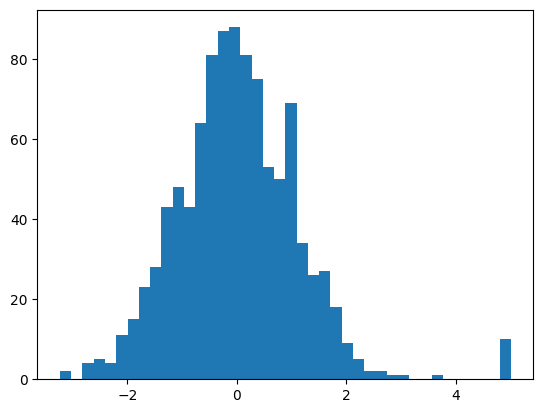

In [63]:
plt.hist(neg, bins=40)

## Correlation Coefficient
In statistics, <b>correlation</b> shows whether and how strongly pairs of variables are related, e.g.
1. height and weight of a person
2. age and salary
3. (years and mileage) and resale price
4. temperate and sales of ice cream.

Value of the correlation coefficient is between -1 and 1.

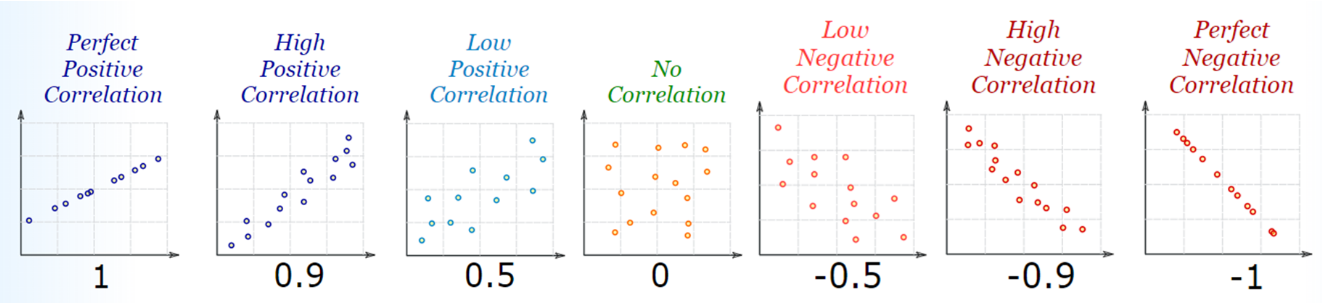

Pearson correlation coefficient between two variables X and Y can be calculated using the following formula. X bar is the mean value of X and Y bar is the mean value of Y. Xi and Yi represents different values of X and Y.
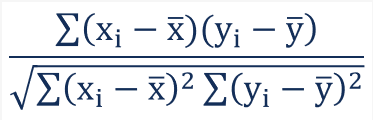

<h3>Why we often use correlation in data science?</h3>
<ol>
    <li>Correlation is used in <b>linear regression</b> models to determine the strength of the relationship between the dependent and independent variables. 
    <li>Correlation is often used in machine learning to identify <b>multicollinearity</b>, which is when two or more predictor variables are highly correlated with each other. Multicollinearity can impact the accuracy of predictive models, so it’s important to identify and remove predictors that are associated with high multicollinearity. 

### Two common ways of calculating (Pearson) correlation coefficient:
1. numpy.corrcoef()
2. Pandas’s dataframe.corr()

### NumPy's corrcoef() functions

In [64]:
import numpy as np

np.random.seed(1)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 200)

In [65]:
# To have y to be x plus some positive-correlation noise
y = x + np.random.normal(0, 5, 200)

np.corrcoef(x, y)

array([[1.        , 0.94410086],
       [0.94410086, 1.        ]])

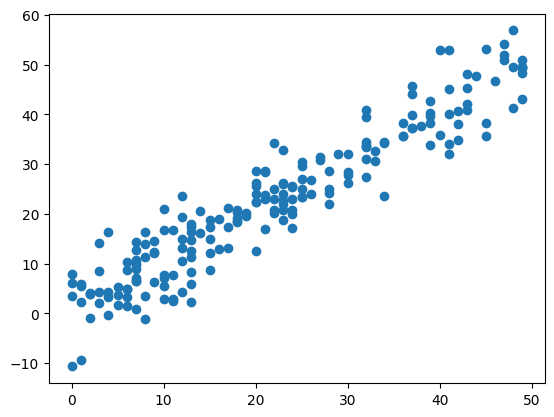

In [66]:
plt.scatter(x, y)
plt.show()

In [67]:
# Now let's try negative correlation

np.random.seed(1)

x = np.random.randint(0, 50, 200)      # random integers between 0 and 50

y = 100 - x + np.random.normal(0, 5, 200)  # Negative correlation with some noise

np.corrcoef(x, y)

array([[ 1.        , -0.94640044],
       [-0.94640044,  1.        ]])

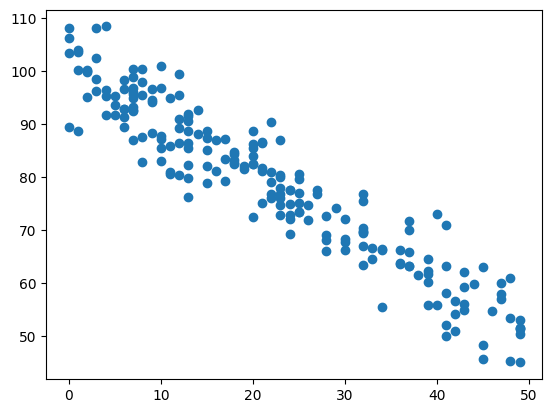

In [68]:
plt.scatter(x, y)
plt.show()

In [69]:
x = np.random.randint(0, 50, 200)
y = np.random.randint(0, 50, 200)

np.corrcoef(x, y)

array([[1.        , 0.01754735],
       [0.01754735, 1.        ]])

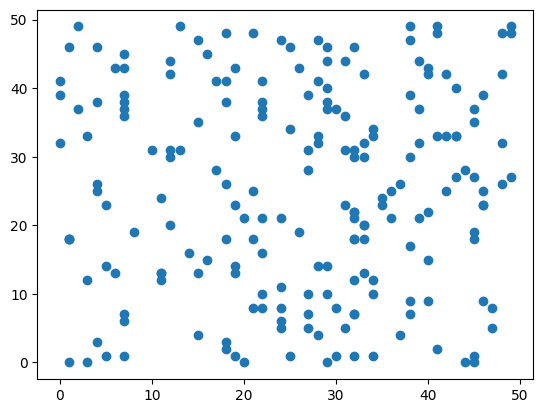

In [70]:
plt.scatter(x, y)
plt.show()

In [71]:
# Numpy correlation of more than 2 varialbes is okay

z = x + y

np.corrcoef(x, [y, z])

array([[1.        , 0.01754735, 0.68744225],
       [0.01754735, 1.        , 0.73819001],
       [0.68744225, 0.73819001, 1.        ]])

### Pandas’s dataframe.corr()

In [72]:
import numpy as np
import pandas as pd

np.random.seed(1)
n = 200

df = pd.DataFrame({'a': np.random.randint(0, 50, n)})
df['pos'] = df['a'] + np.random.normal(0, 10, n)      # positively correlated with 'a'
df['neg'] = 100 - df['a'] + np.random.normal(0, 5, n) # negatively correlated with 'a'
df['unr'] = np.random.randint(0, 50, n)               # not correlated with 'a'

df

,a,pos,neg,unr
0,37,42.82,61.19,22
1,43,38.90,52.42,2
2,12,34.97,92.77,22
3,8,24.88,90.24,1
4,9,15.26,96.50,8
...,...,...,...,...
195,5,2.22,94.68,28
196,36,40.37,62.42,45
197,37,37.38,56.16,28
198,21,35.90,73.61,4


In [73]:
df.corr()
# ใช้บ่อยมากประมาณนี้

,a,pos,neg,unr
a,1.00,0.82,-0.95,-0.04
pos,0.82,1.00,-0.80,-0.07
neg,-0.95,-0.80,1.00,0.02
unr,-0.04,-0.07,0.02,1.00


<AxesSubplot:>

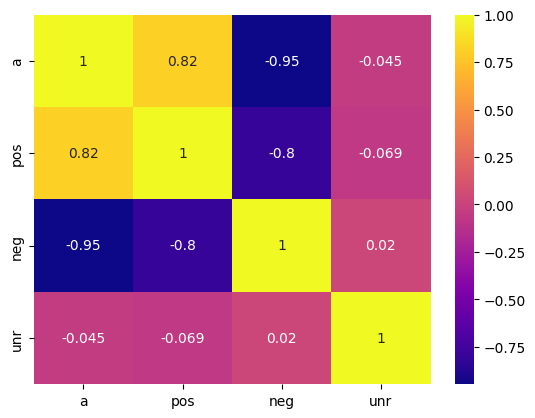

In [75]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='plasma')

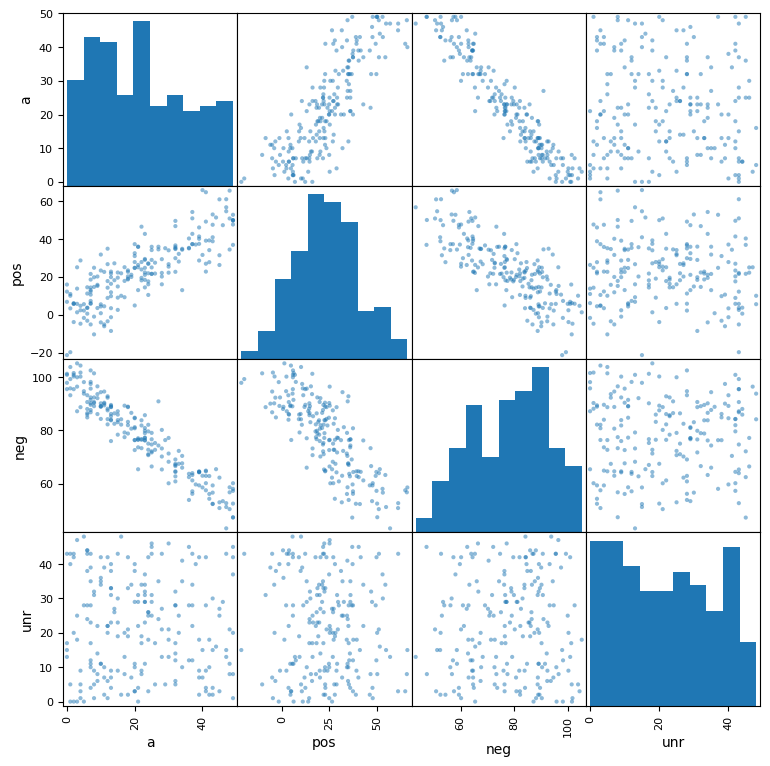

In [76]:
pd.plotting.scatter_matrix(df, figsize=(9, 9))
plt.show()

# GroupBy Function

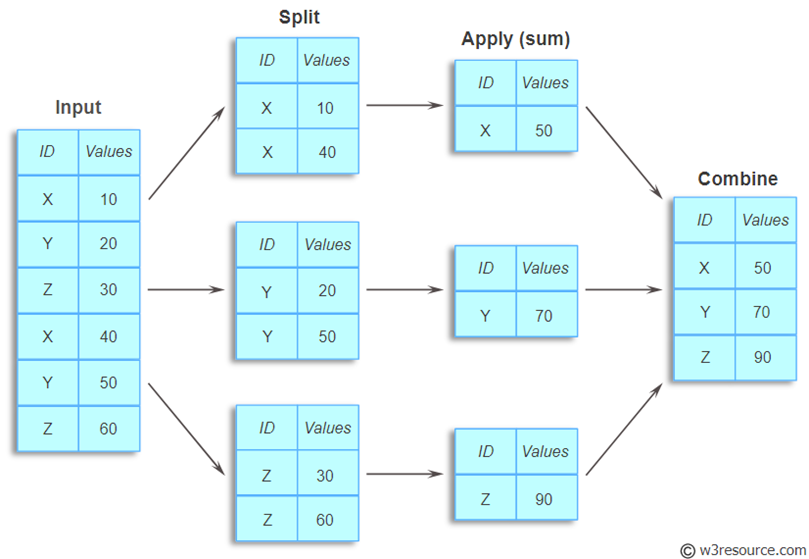

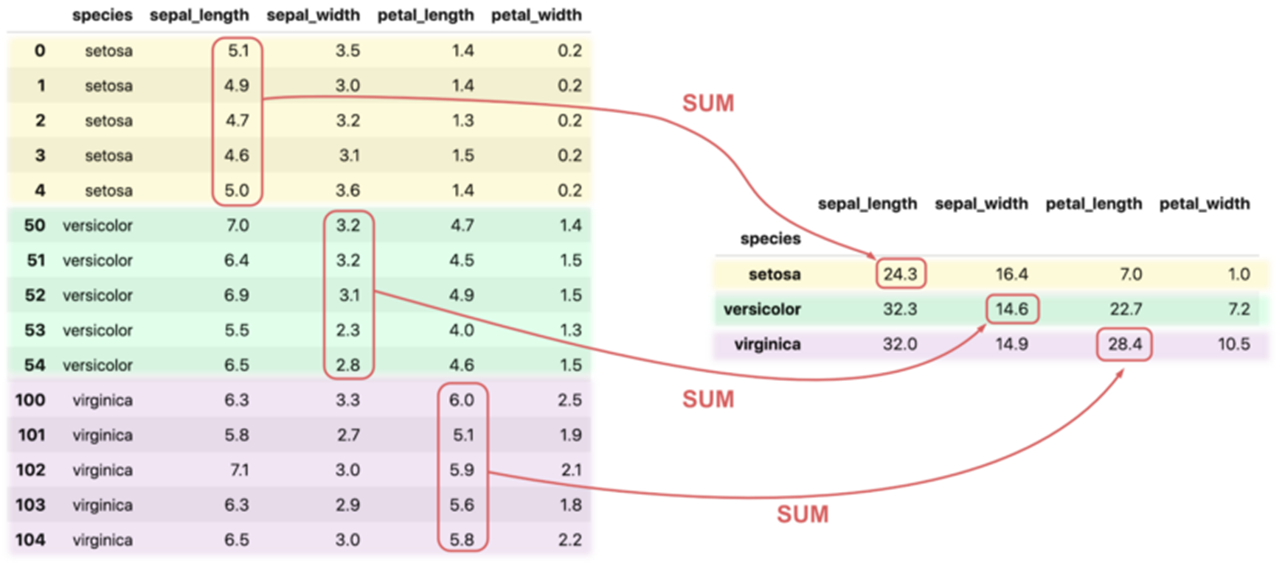

In [ ]:
data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings', 'kings', 
                 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank'  : [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year'  : [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points': [876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(data)
df

In [ ]:
# call groupby() to the dataframe and its get_group() to show the groups
yg = df.groupby('Year')
yg.get_group(2014)

In [ ]:
df.groupby('Team').count()

In [ ]:
df.groupby('Team')['Points'].count()

#### Use .aggregate function with mainly NumPy functions to the group

In [ ]:
df.groupby('Team')['Points'].sum()  # Series

In [ ]:
df.groupby('Team')[['Points']].sum()  # DataDrame

In [ ]:
df.groupby('Team')['Points'].agg(np.mean) # APPLY mostly with aggregate function

In [ ]:
df.groupby('Team')['Points'].agg([np.size, np.mean])

In [ ]:
df.groupby(['Team', 'Year'])['Points'].agg([np.size, np.mean])

In [ ]:
df.groupby(['Year', 'Team'])['Points'].agg([np.size, np.mean])

In [ ]:
# เขียน .group() เต็มชุดเลยก็ได้ช่วยให้ชัดเจน แต่ยาว
#
df.groupby('Team')['Points'].agg([np.size, np.mean, np.std, max, min])

#### Use groupby's filter function with lambda for more complicated tasks

In [ ]:
df.groupby('Team').filter(lambda x: len(x) >= 3) # กรองเฉพาะทีมที่มี > 3 รายการ

In [ ]:
# for more complicated task, it's suggested to use temporary variables
#
more3 = df.groupby('Team').filter(lambda x: len(x) >= 3) # กรองเฉพาะทีมที่มี > 3 รายการ
more3.sort_values(by='Year')